# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [37]:
m1 = np.array([1, 1])
m2 = np.array([0, 0])

sigma = np.array([[1, -0.5], [-0.5, 1]])

In [38]:
# sampling
n = 500
Y_generative = [1] * n + [-1] * n
X_generative = np.concatenate(
    [
        np.random.multivariate_normal(m1, sigma, n),
        np.random.multivariate_normal(m2, sigma, n),
    ]
)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


$$p(y=1|x)=\frac{p(x|y=1)p(y=1)}{p(x)}$$
$$p(x)=p(x|y=1)p(y=1)+p(x|y=-1)p(y=-1)$$

Answer: Yes, it corresponds to a logistic model.

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

$$\beta_0=log\frac{\pi}{1-\pi}+\frac{1}{2} m_2^T\Sigma^{-1}m_2-\frac{1}{2} m_1^T\Sigma^{-1}m_1$$
$$\beta=\Sigma^{-1}(m_1-m_2)$$

In [39]:
# computing beta_0 and beta using the formulas

B_0 = -0.5 * (m1 @ np.linalg.inv(sigma) @ m1 - m2 @ np.linalg.inv(sigma) @ m2)
B = np.linalg.inv(sigma) @ (m1 - m2)
print(f"B = {B}, B_0 = {B_0}")

B = [2. 2.], B_0 = -2.0


In [40]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.38188312]), array([[2.23252021, 2.32529736]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [41]:
# sampling
n = 1000
x1 = np.random.multivariate_normal(m1, sigma, n)
x2 = np.random.multivariate_normal(m2, sigma, n)
mixture_coef = np.random.binomial(1, 0.5, n)
X_discriminative = np.vstack((x1[mixture_coef == 0, :], x2[mixture_coef == 1, :]))
probability_y = 1 / (1 + np.exp(-(-2 + np.dot(X_discriminative, np.array([2, 2])))))
Y_discriminative = np.random.binomial(1, probability_y, n)

In [42]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.88428981]), array([[1.92599876, 1.98630168]]))

#### Second bullet point

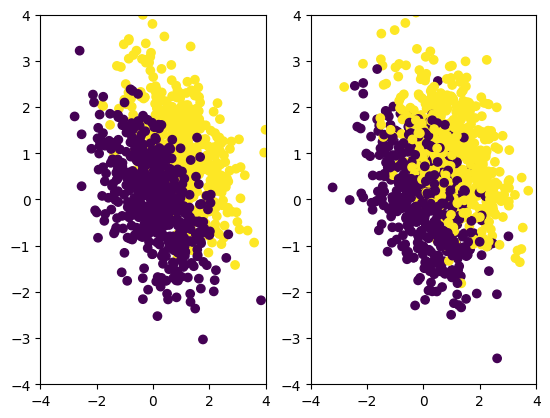

In [43]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:, 0], X_discriminative[:, 1], c=Y_discriminative)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

**Answer:** We have the same joint distributions of $p(x,y)$ (as seen in scatterplots), but the two approches differ from a simulation and modeling point of view. For example, in generative approach we cannot estimate $\pi$. In generative approach $\pi$ and $\beta_0$ are entangled as indicated by the formulas in a). 

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

**Answer:** We can use a formula, we obtained in a)

$$p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)}.$$

Now we transform to get a formula for $p(x|y=-1)$:

$$ p(x|y=-1) = \frac{\pi p(x|y=1) (1- p(y=1|x))}{p(y=1|x)(1-\pi)}.$$

We plug in $p(x|y=1) = \exp(-x)$ as $X$ given $Y=1$ follows an exponential distribution with $\lambda=1$, $p(y=1|x) = 1/(1+\exp(-\beta_0-\beta_1 x))$ (a logistic model assumption) and $p(y=-1|x) = 1/(1+\exp(\beta_0+\beta_1 x))$, thus

$$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x).$$

$X$ given $Y=-1$ also follows exponential distribution with $\lambda=\beta_1+1$.

In [44]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)
n2 = 2000
x2 = np.random.exponential(1 / (beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [45]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.43687279]), array([[1.06591363]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

Q2. Once π is fixed, do we have freedom to choose an intercept in the logistic model thus constructed?

No, we do not have freedom to choose an intercept.

Q3. If π is not given, is the intercept in the logistic model uniquely determined?

No, it depends on $\pi$.

The reasoning leading to the answers follows from Q1 (above) and $\beta_0$ calculations (below).

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

We have from Q1

$$p(x|y=-1) = \frac{\pi}{1-\pi} \exp(-\beta_0) \exp(-(\beta_1+1)x)$$

We can substitute from the task $\pi = \frac{1}{3}$, $\beta_1=1$.

$$p(x|y=-1) = \frac{1}{2} \exp(-\beta_0)\cdot\exp(-2x).$$

It is the exponential distribution with $\lambda = 2$ and its integral equals to 1. Hence, $\frac{1}{2}\cdot\exp(-\beta_0) = 2$.

We obtain that $\beta_0 = -\log(4)$.

In [46]:
-np.log(4)

-1.3862943611198906

In [47]:
# a numeric answer to the question about beta0
pi_c = n1 / (n1 + n2)
-np.log((1 - pi_c) / pi_c * (beta1 + 1))

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [48]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [49]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [50]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [51]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [52]:
# excess risk
# ...

In [53]:
# simulations with fixed sample size

In [54]:
# simulations for various sample sizes

In [55]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)